In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from schemas import DataCatalog
import constants as const

import seaborn as sns

In [4]:
# load data catalog
catalog =  DataCatalog.load_from_yaml("data_catalog.yaml")

In [5]:
OLD_AGE_OVER =65
WORKING_AGE=20

# OADR = number of pension in a population / working age in a population

In [ ]:
# HYPOTHESIS : OADR could be a proxy for population complexity and therefore number of GP appointments per annum

# calculate OADR for each ICB in 2021-22 (FY) and compare to number of appointments (per head of population), is there a correlation?
# fit a model (linear sklearn)

## **Appoitments SUB-ICB level**

In [6]:
# this is the first in the dataset list
gp_appts_catalog_entry = catalog.single_data_sources[0]
gp_appts_df = gp_appts_catalog_entry.load()
print(gp_appts_catalog_entry.zip_file.namelist())
print(gp_appts_df.shape)

['Regional_CSV_WYorks.csv', 'Regional_CSV_Sussex.csv', 'Regional_CSV_SurreyHearts.csv', 'Regional_CSV_SuffolkNEEssex.csv', 'Regional_CSV_StaffsStoke.csv', 'Regional_CSV_Somerset.csv', 'Regional_CSV_ShropsTelfordWrekin.csv', 'Regional_CSV_SYorks.csv', 'Regional_CSV_SWLondon.csv', 'Regional_CSV_SELondon.csv', 'Regional_CSV_NottinghamNotts.csv', 'Regional_CSV_Northamptonshire.csv', 'Regional_CSV_NorfolkWaveney.csv', 'Regional_CSV_NWLondon.csv', 'Regional_CSV_NENCumbria.csv', 'Regional_CSV_NELondon.csv', 'Regional_CSV_NCLondon.csv', 'Regional_CSV_MidSEssex.csv', 'Regional_CSV_Lincolnshire.csv', 'Regional_CSV_LeicesterLshire.csv', 'Regional_CSV_LancsSCumbria.csv', 'Regional_CSV_KentMedway.csv', 'Regional_CSV_HumberNYorks.csv', 'Regional_CSV_HertfordshireWEssex.csv', 'Regional_CSV_HereWorcs.csv', 'Regional_CSV_HampshireIoW.csv', 'Regional_CSV_Gloucestershire.csv', 'Regional_CSV_GManchesterHSCP.csv', 'Regional_CSV_FrimleyHealth.csv', 'Regional_CSV_Dorset.csv', 'Regional_CSV_Devon.csv', 'Regio

In [7]:
#Combining data for all the ICB's
dfs = []
for ccg_name in gp_appts_catalog_entry.zip_file.namelist():
    gp_appts_catalog_entry.csv_file = ccg_name
    dfs.append(gp_appts_catalog_entry.load())

combined_df = pd.concat(dfs, axis=0)
combined_df.head()

,SUB_ICB_LOCATION_CODE,SUB_ICB_LOCATION_ONS_CODE,SUB_ICB_LOCATION_NAME,ICB_ONS_CODE,ICB_NAME,REGION_ONS_CODE,REGION_NAME,APPOINTMENT_MONTH,APPT_STATUS,HCP_TYPE,APPT_MODE,TIME_BETWEEN_BOOK_AND_APPT,COUNT_OF_APPOINTMENTS
0,02T,E38000025,NHS West Yorkshire ICB - 02T,E54000054,NHS West Yorkshire Integrated Care Board,E40000012,North East and Yorkshire,MAR2021,Attended,GP,Face-to-Face,1 Day,1999
1,02T,E38000025,NHS West Yorkshire ICB - 02T,E54000054,NHS West Yorkshire Integrated Care Board,E40000012,North East and Yorkshire,MAR2021,Attended,GP,Face-to-Face,15 to 21 Days,329
2,02T,E38000025,NHS West Yorkshire ICB - 02T,E54000054,NHS West Yorkshire Integrated Care Board,E40000012,North East and Yorkshire,MAR2021,Attended,GP,Face-to-Face,2 to 7 Days,4194
3,02T,E38000025,NHS West Yorkshire ICB - 02T,E54000054,NHS West Yorkshire Integrated Care Board,E40000012,North East and Yorkshire,MAR2021,Attended,GP,Face-to-Face,22 to 28 Days,212
4,02T,E38000025,NHS West Yorkshire ICB - 02T,E54000054,NHS West Yorkshire Integrated Care Board,E40000012,North East and Yorkshire,MAR2021,Attended,GP,Face-to-Face,8 to 14 Days,1101


In [29]:
#Filtering the data for FY2022-23
dates_to_keep = ['APR2022','MAY2022', 'JUN2022', 'JUL2022', 'AUG2022', 'SEP2022', 'OCT2022', 'NOV2022', 'DEC2022', 'JAN2023', 'FEB2023', 'MAR2023']
filtered_df = combined_df[combined_df['APPOINTMENT_MONTH'].isin(dates_to_keep)]

In [75]:
#Grouping the data in a series by SUB-ICB-CODE name and appointments count
appointments_icb_sub = filtered_df.groupby(['SUB_ICB_LOCATION_ONS_CODE'])['COUNT_OF_APPOINTMENTS'].sum()
appointments_icb_sub.name = 'FY2022Appointments'

#Converting series to Dataframe    
appointments_sub_icb = pd.DataFrame(appointments_icb_sub).sort_values(by='FY2022Appointments')   
appointments_sub_icb.head()

,FY2022Appointments
SUB_ICB_LOCATION_ONS_CODE,
E38000200,621398
E38000161,661510
E38000068,704787
E38000170,707004
E38000028,739819


In [24]:
filtered_df.groupby(['SUB_ICB_LOCATION_NAME','APPOINTMENT_MONTH']).sum(numeric_only=True).sort_values(by='COUNT_OF_APPOINTMENTS' ,ascending = False)

COUNT_OF_APPOINTMENTS
SUB_ICB_LOCATION_NAME                      APPOINTMENT_MONTH                       
NHS North West London ICB - W2U3Z          MAR2023                          1340344
                                           NOV2022                          1267189
                                           OCT2022                          1267067
                                           SEP2022                          1209066
                                           JAN2023                          1199728
...                                                                             ...
NHS Lancashire and South Cumbria ICB - 02G JUL2022                            48372
                                           DEC2022                            47816
NHS Cheshire and Merseyside ICB - 01T      APR2022                            47686
NHS Lancashire and South Cumbria ICB - 02G JUN2022                            46965
                                           APR2022                            45216

[1272 rows x 1 columns]

### **Appointments Sub-ICB'S under SNEE ICB**

,FY2022Appointment
SUB_ICB_LOCATION_NAME,
NHS Suffolk and North East Essex ICB - 07K,1560340
NHS Suffolk and North East Essex ICB - 06T,2131412
NHS Suffolk and North East Essex ICB - 06L,2305618


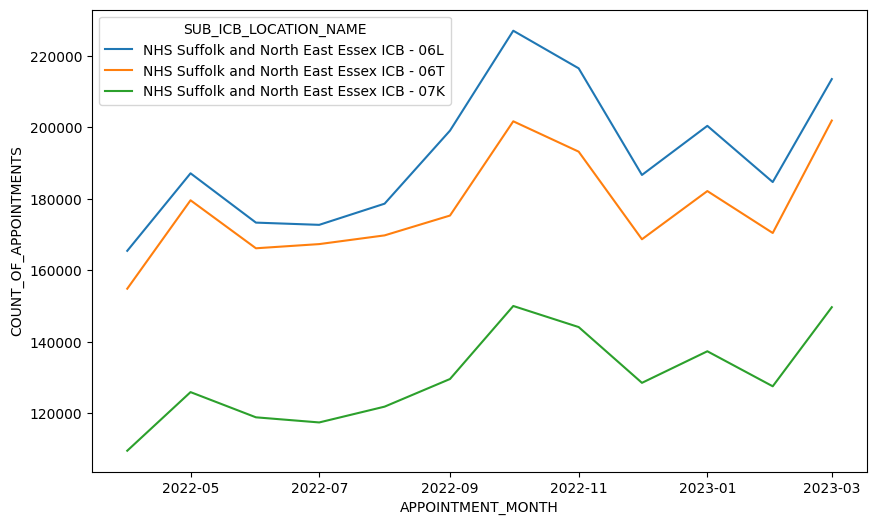

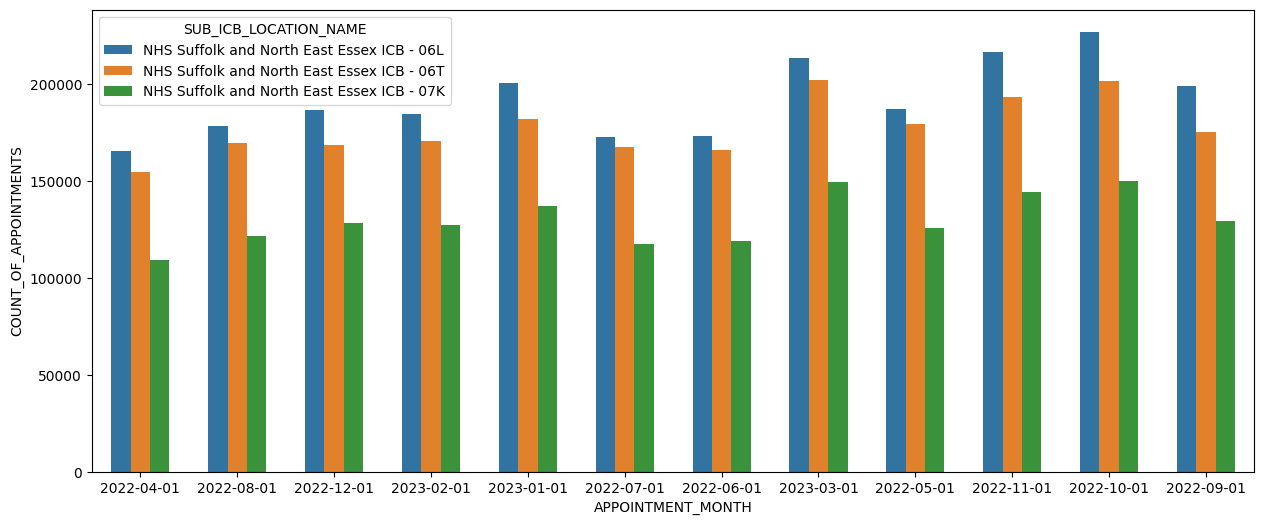

In [77]:
#Filtering the data to keep only SNEE ICB
required_icb = 'NHS Suffolk and North East Essex Integrated Care Board'
filtered_df_snee = (filtered_df[filtered_df['ICB_NAME'] == required_icb]
                    .groupby(['SUB_ICB_LOCATION_NAME','APPOINTMENT_MONTH'])
                    .sum(numeric_only=True)
                    .reset_index()
                    .assign(APPOINTMENT_MONTH=lambda df: pd.to_datetime(df['APPOINTMENT_MONTH'], format="%b%Y"))
                    )

#Plotting lineplot for sub-icb's under SNEE ICB
plt.figure(figsize=(10,6))
sns.lineplot(data=filtered_df_snee, x='APPOINTMENT_MONTH', y='COUNT_OF_APPOINTMENTS', hue='SUB_ICB_LOCATION_NAME')

#Plotting Barplot for sub-icb's under SNEE ICB
plt.figure(figsize=(15,6))
sns.barplot(data=filtered_df_snee, x='APPOINTMENT_MONTH', y='COUNT_OF_APPOINTMENTS', hue='SUB_ICB_LOCATION_NAME', width=0.6)
#ax.set_title('GP Appointments sub-icb level (SNEE ICB)')
#ax.set_ylabel('Number of appointments')
#ax.tick_params(axis='x',rotation=40, labelsize=12)
#ax.grid(True, linestyle='--', alpha=0.5)

#Grouping the data in a series for sub icb's in SNEE ICB and appointments count
appointments_icb_sub_snee = filtered_df_snee.groupby('SUB_ICB_LOCATION_NAME')['COUNT_OF_APPOINTMENTS'].sum()
appointments_icb_sub_snee.name = 'FY2022Appointment'

#Converting series to Dataframe    
appointments_sub_icb_snee = pd.DataFrame(appointments_icb_sub_snee).sort_values(by='FY2022Appointment')
appointments_sub_icb_snee.head()

# **ONS Projection catalog for calculating OADR**

In [61]:
# this is the fifth in the dataset list
ons_projection_catalog_entry = catalog.scenario_data_sources[0].scenarios[0]
ons_projection_df = ons_projection_catalog_entry.load()
print(ons_projection_catalog_entry.zip_file.namelist())
print(ons_projection_df.shape)
ons_projection_df.tail()

['2018 SNPP CCG pop females.csv', '2018 SNPP CCG pop males.csv', '2018 SNPP CCG pop persons.csv', 'SNPP Z2 CCG Pop_read me.txt']
(17940, 31)


,AREA_CODE,AREA_NAME,COMPONENT,SEX,AGE_GROUP,2018,2019,2020,2021,2022,...,2034,2035,2036,2037,2038,2039,2040,2041,2042,2043
17935,E38000152,NHS South Devon and Torbay CCG,Population,persons,87,1307.0,1334.725,1316.542,1376.336,1360.736,...,2756.787,2492.084,2372.881,2266.242,2228.551,2197.967,2331.509,2311.180,2321.696,2401.460
17936,E38000152,NHS South Devon and Torbay CCG,Population,persons,88,1078.0,1190.384,1214.045,1199.986,1251.577,...,1950.259,2531.128,2291.237,2181.341,2088.643,2055.192,2028.835,2152.992,2135.857,2148.003
17937,E38000152,NHS South Devon and Torbay CCG,Population,persons,89,1003.0,975.507,1069.356,1092.092,1081.674,...,1711.665,1777.297,2307.055,2094.456,1993.710,1912.894,1884.574,1862.794,1976.278,1964.194
17938,E38000152,NHS South Devon and Torbay CCG,Population,persons,90 and over,4225.0,4240.907,4193.539,4236.345,4295.879,...,5964.451,6286.103,6611.323,7346.584,7788.995,8069.665,8228.911,8329.465,8389.377,8532.641
17939,E38000152,NHS South Devon and Torbay CCG,Population,persons,All ages,285360.0,287867.822,290292.793,292737.261,295145.318,...,318882.908,320478.843,322046.583,323599.677,325139.311,326659.312,328155.027,329642.474,331110.037,332565.592


In [49]:
all_ages_pop = ons_projection_df.loc[ons_projection_df['AGE_GROUP']=='All ages'].drop(columns=['COMPONENT','AGE_GROUP','SEX','AREA_NAME'])[['AREA_CODE','2022']].set_index('AREA_CODE')
print(all_ages_pop.index.nunique())
all_ages_pop.head()

195


,2022
AREA_CODE,
E38000004,216826.434
E38000005,406061.106
E38000011,251931.170
E38000020,338873.083
E38000023,338249.835


In [53]:
print(appointments_sub_icb.index.nunique())
appointments_sub_icb.head()

106


,FY2022Appointments
SUB_ICB_LOCATION_ONS_CODE,
E38000200,621398
E38000161,661510
E38000068,704787
E38000170,707004
E38000028,739819


## **Combining both the series - Appointments and OADR based on sub-ICB code**

In [52]:
sub_icb_pop_appointments = appointments_sub_icb.join(all_ages_pop, how='inner')
print(sub_icb_pop_appointments.index.nunique())
sub_icb_pop_appointments.head()
#sub_icb_pop_appointments.columns = ['appts','pop']
#sub_icb_pop_appointments['appts_per_capita'] = sub_icb_pop_appointments['appts'] / sub_icb_pop_appointments['pop'] 

#sub_icb_pop_appointments.sort_values('appts_per_capita')

74


,FY2022Appointments,2022
E38000200,621398,114812.235
E38000161,661510,160456.951
E38000068,704787,130533.166
E38000170,707004,117811.723
E38000028,739819,140225.975


In [ ]:
retired_pop = ons_projection_df[ons_projection_df['AGE_GROUP'] >= 65]
working_pop = ons_projection_df[(ons_projection_df['AGE_GROUP'] >= 20) & (gp_appts_df2['AGE_YEARS'] < 65)]

#Grouping the data in a series by ICB name and Age
retired_count = retired_pop.groupby('ICB_NAME')['AGE_YEARS'].count()
working_count = working_pop.groupby('ICB_NAME')['AGE_YEARS'].count()

#Calculting the dependency ratio 
dependency_ratio = (retired_count/working_count) * 100

#converting series to Dataframe
oadr_df = pd.DataFrame(dependency_ratio)
#sorted_oadr_df = oadr_df.sort_values(by='AGE_YEARS',ascending=False)
print(oadr_df)

In [41]:
unique_area_code_appt = combined_df['SUB_ICB_LOCATION_ONS_CODE'].unique()
unique_area_code_projctn = ons_projection_df['AREA_CODE'].unique()

differences = set(unique_area_code_appt)^set(unique_area_code_projctn)

differences_list = list(differences)

print(len(differences_list))

['E38000238', 'E38000192', 'E38000058', 'E38000004', 'E38000073', 'E38000180', 'E38000237', 'E38000039', 'E38000206', 'E38000082', 'E38000098', 'E38000145', 'E38000124', 'E38000154', 'E38000103', 'E38000072', 'E38000100', 'E38000256', 'E38000047', 'E38000081', 'E38000108', 'E38000213', 'E38000249', 'E38000142', 'E38000257', 'E38000070', 'E38000134', 'E38000109', 'E38000193', 'E38000054', 'E38000247', 'E38000166', 'E38000107', 'E38000202', 'E38000230', 'E38000138', 'E38000009', 'E38000157', 'E38000231', 'E38000018', 'E38000248', 'E38000090', 'E38000144', 'E38000211', 'E38000020', 'E38000071', 'E38000179', 'E38000244', 'E38000162', 'E38000186', 'E38000115', 'E38000063', 'E38000046', 'E38000075', 'E38000156', 'E38000218', 'E38000239', 'E38000042', 'E38000087', 'E38000105', 'E38000140', 'E38000261', 'E38000037', 'E38000074', 'E38000092', 'E38000220', 'E38000167', 'E38000078', 'E38000099', 'E38000066', 'E38000048', 'E38000234', 'E38000246', 'E38000224', 'E38000121', 'E38000263', 'E38000102'

In [52]:
xys = ons_projection_df[ons_projection_df['AREA_CODE'].isin(differences_list)]

corresponding_values = xys['AREA_NAME'].tolist()

listd = set(corresponding_values)

print(listd)

{'NHS Bath and North East Somerset CCG', 'NHS Warwickshire North CCG', 'NHS Hounslow CCG', 'NHS Barking and Dagenham CCG', 'NHS Eastern Cheshire CCG', 'NHS Birmingham and Solihull CCG', 'NHS South Norfolk CCG', 'NHS Canterbury and Coastal CCG', 'NHS Islington CCG', 'NHS Norwich CCG', 'NHS Eastbourne, Hailsham and Seaford CC', 'NHS Mansfield and Ashfield CCG', 'NHS Lincolnshire West CCG', 'NHS Southampton CCG', 'NHS Nottingham West CCG', 'NHS Medway CCG', 'NHS Surrey Heath CCG', 'NHS Bromley CCG', 'NHS Haringey CCG', 'NHS North Hampshire CCG', 'NHS Merton CCG', 'NHS Coventry and Rugby CCG', 'NHS Northern, Eastern and Western Devon', 'NHS Redbridge CCG', 'NHS Erewash CCG', 'NHS Bradford Districts CCG', 'NHS Hambleton, Richmondshire and Whitby', 'NHS South Kent Coast CCG', 'NHS Harrow CCG', 'NHS Walsall CCG', 'NHS Lambeth CCG', 'NHS City and Hackney CCG', 'NHS Luton CCG', 'NHS South West Lincolnshire CCG', 'NHS Brent CCG', 'NHS Horsham and Mid Sussex CCG', 'NHS North West Surrey CCG', 'NH

In [20]:
# this is the fifth in the dataset list
gp_appts_catalog_entry4 = catalog.single_data_sources[4]
gp_appts_df2 = gp_appts_catalog_entry4.load()
print(gp_appts_catalog_entry4.zip_file.namelist())
print(gp_appts_df2.shape)
gp_appts_df2.head()

['1. General Practice – August 2023 Individual Level.csv', '0. General Practice Month Year Individual Level Definitions.xlsx', '0. Guide to using Pivot Tables with the Individual-level CSV.pdf']
(200195, 19)


/workspaces/PrimaryCareDemandAndCapacity/schemas.py:144: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  return pd.read_csv(csv_file, **read_csv_kwargs)


,YEAR,Month,COMM_REGION_CODE,COMM_REGION_NAME,ICB_CODE,ICB_NAME,SUB_ICB_CODE,SUB_ICB_NAME,DATA_SOURCE,UNIQUE_IDENTIFIER,STAFF_GROUP,DETAILED_STAFF_ROLE,STAFF_ROLE,COUNTRY_QUALIFICATION_AREA,COUNTRY_QUALIFICATION_GROUP,AGE_BAND,AGE_YEARS,GENDER,FTE
0,2023,8,Y62,North West,QE1,NHS Lancashire and South Cumbria ICB,01K,NHS Lancashire and South Cumbria ICB - 01K Mor...,Provided,33144,GP,Partner/Provider,GP Partners,Asia South,Elsewhere,45-49,49.0,Male,1.013333
1,2023,8,Y63,North East and Yorkshire,QHM,NHS North East and North Cumbria ICB,84H,NHS North East and North Cumbria ICB - 84H Cou...,Provided,134521,Direct Patient Care,Other,Other Direct Patient Care,Not Applicable,Not Applicable,30-34,34.0,Female,0.986667
2,2023,8,Y63,North East and Yorkshire,QHM,NHS North East and North Cumbria ICB,16C,NHS North East and North Cumbria ICB - 16C Tee...,Provided,37777,GP,Senior Partner,GP Partners,EEA,EEA,60-64,60.0,Male,1.000000
3,2023,8,Y63,North East and Yorkshire,QHM,NHS North East and North Cumbria ICB,84H,NHS North East and North Cumbria ICB - 84H Cou...,Provided,83374,GP,Salaried By Practice,Salaried GPs,UK,UK,30-34,31.0,Male,0.560000
4,2023,8,Y63,North East and Yorkshire,QHM,NHS North East and North Cumbria ICB,84H,NHS North East and North Cumbria ICB - 84H Cou...,Provided,183380,Admin/Non-Clinical,Medical Secretary,Medical Secretaries,Not Applicable,Not Applicable,60-64,63.0,Female,0.850133


In [77]:
retired_pop = gp_appts_df2[gp_appts_df2['AGE_YEARS'] >= 65]
working_pop = gp_appts_df2[(gp_appts_df2['AGE_YEARS'] >= 20) & (gp_appts_df2['AGE_YEARS'] < 65)]

#Grouping the data in a series by ICB name and Age
retired_count = retired_pop.groupby('ICB_NAME')['AGE_YEARS'].count()
working_count = working_pop.groupby('ICB_NAME')['AGE_YEARS'].count()

#Calculting the dependency ratio 
dependency_ratio = (retired_count/working_count) * 100

#converting series to Dataframe
oadr_df = pd.DataFrame(dependency_ratio)
#sorted_oadr_df = oadr_df.sort_values(by='AGE_YEARS',ascending=False)
print(oadr_df)

                                                    AGE_YEARS
ICB_NAME                                                     
NHS Bath and North East Somerset, Swindon and W...   4.938989
NHS Bedfordshire, Luton and Milton Keynes ICB        6.552806
NHS Birmingham and Solihull ICB                      6.026447
NHS Black Country ICB                                6.370450
NHS Bristol, North Somerset and South Glouceste...   4.909140
NHS Buckinghamshire, Oxfordshire and Berkshire ...   8.192040
NHS Cambridgeshire and Peterborough ICB              6.731392
NHS Cheshire and Merseyside ICB                      6.003329
NHS Cornwall and The Isles Of Scilly ICB             5.050505
NHS Coventry and Warwickshire ICB                    7.413914
NHS Derby and Derbyshire ICB                         4.526861
NHS Devon ICB                                        5.158981
NHS Dorset ICB                                       6.413302
NHS Frimley ICB                                      9.786223
NHS Glou

## **Combining both the series - Appointments and OADR based on ICB**

In [105]:
#Changing 'Integrated Care Board' to 'ICB' in the index name to match the index of both the dataframes
for old_word, new_word in {'Integrated Care Board': 'ICB'}.items():
    appointments_df.index = appointments_df.index.str.replace(old_word, new_word )
    
#Combining both dataframes
appointments_vs_oadr = pd.concat([appointments_df,oadr_df], axis=1)

#sorting
sorted_appointments_vs_oadr = appointments_vs_oadr.sort_values(by='AGE_YEARS',ascending=False)
sorted_appointments_vs_oadr.head(50)

,COUNT_OF_APPOINTMENTS,AGE_YEARS
ICB_NAME,,
NHS North West London ICB,7138.0,10.457866
NHS South West London ICB,7559.0,10.314016
NHS Mid and South Essex ICB,23697.0,9.807976
NHS Frimley ICB,5763.0,9.786223
NHS Surrey Heartlands ICB,6729.0,9.186697
NHS North East London ICB,7302.0,9.036952
NHS North Central London ICB,6387.0,8.846052
NHS Hertfordshire and West Essex ICB,16795.0,8.809135
NHS South East London ICB,7364.0,8.517961
